In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# # File to Load (Remember to Change These)
# mouse_drug_data_to_load = "data/mouse_drug_data.csv"
# clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data


# Combine the data into a single dataset


# Display the data table for preview



In [2]:
# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"



# Read the Mouse and Drug Data and the Clinical Trial Data

drug_mouse_df = pd.read_csv(mouse_drug_data_to_load)
clinical_data_df = pd.read_csv(clinical_trial_data_to_load)
print(drug_mouse_df.head())
clinical_data_df.head()

  Mouse ID      Drug
0     f234  Stelasyn
1     x402  Stelasyn
2     a492  Stelasyn
3     w540  Stelasyn
4     v764  Stelasyn


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [3]:
# Combine the data into a single dataset and display head
trial_df = pd.merge(clinical_data_df,drug_mouse_df, how='left', on = 'Mouse ID' )
trial_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [4]:
# # Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
# trial_drug_timpoint_df = trial_df.groupby(["Drug","Timepoint"])

# # Convert to DataFrame
# trial_drug_timpoint_df = trial_drug_timpoint_df["Tumor Volume (mm3)"].mean()
# trial_drug_timpoint_df = trial_drug_timpoint_df.reset_index()
# # Preview DataFrame
# trial_drug_timpoint_df.head()


In [5]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_drug_timpoint_df = trial_df.groupby(["Drug","Timepoint"])

# Convert to DataFrame
mean_drug_timpoint_df = mean_drug_timpoint_df["Tumor Volume (mm3)"].mean()
mean_drug_timpoint_df = mean_drug_timpoint_df.reset_index()
# Preview DataFrame
mean_drug_timpoint_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [6]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# bring in required dependencies
from scipy.stats import sem

 
stderror_drug_timpoint_df = trial_df.groupby(["Drug","Timepoint"])

# Convert to DataFrame
stderror_drug_timpoint_df = stderror_drug_timpoint_df["Tumor Volume (mm3)"].sem()
stderror_drug_timpoint_df = stderror_drug_timpoint_df.reset_index()
# Preview DataFrame
stderror_drug_timpoint_df.head(10)
#print(type(stderror_drug_timpoint_df))

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
5,Capomulin,25,0.881642
6,Capomulin,30,0.934460
7,Capomulin,35,1.052241
8,Capomulin,40,1.223608
9,Capomulin,45,1.223977


In [7]:
# Minor Data Munging to Re-Format the Data Frames

stderr_tumorvol_df = stderror_drug_timpoint_df.pivot(index = "Timepoint", columns = "Drug",values = 'Tumor Volume (mm3)')

pivot_df = mean_drug_timpoint_df.pivot(index = "Timepoint", columns = "Drug",values = 'Tumor Volume (mm3)')
pivot_df
# Preview that Reformatting worked
#print(type(stderr_tumorvol_df))


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


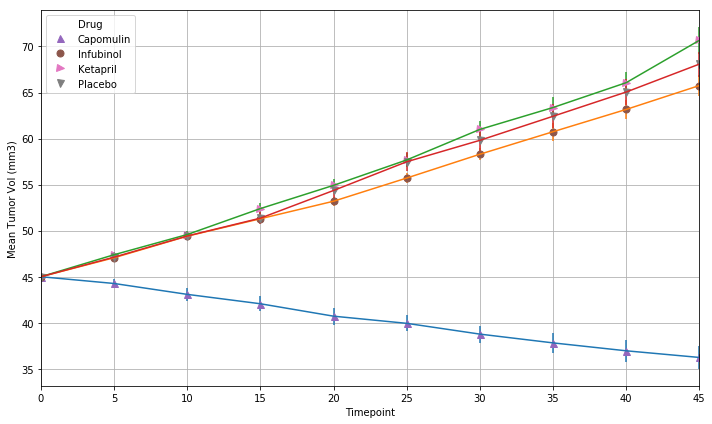

In [8]:
# Generate the Plot (with Error Bars)
ax = pivot_df[["Capomulin", "Infubinol","Ketapril",'Placebo']]\
            .plot( yerr = stderr_tumorvol_df, figsize= (10,6), legend = False)

ax.set_xlabel("Time (Days)")
ax.set_ylabel("Mean Tumor Vol (mm3)")


pivot_df[["Capomulin","Infubinol", "Ketapril", "Placebo"]]\
            .plot(grid = True,style =['^','o','>','v'], markersize =7,legend =True, \
                  label = "Tumor Response to Treatment",ax = ax )

plt.tight_layout()
plt.savefig("../Images/tumor_vol.png")
plt.savefig("Picture/tumor_vol.png")
plt.show()
# Save the Figure
# Show the Figure

## Metastatic Response to Treatment

In [9]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame

# Store the Mean Meta.Site Data Grouped by Drug and Timepoint 
mean_metasite_df = trial_df.groupby(["Drug","Timepoint"])

# Convert to DataFrame
mean_metasite_df = mean_metasite_df['Metastatic Sites'].mean()

#mean_metasite_df= mean_metasite_df.reset_index()
# Preview DataFrame
mean_metasite_df.head()


Drug       Timepoint
Capomulin  0            0.000000
           5            0.160000
           10           0.320000
           15           0.375000
           20           0.652174
Name: Metastatic Sites, dtype: float64

In [11]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame
# Store the Mean Meta. Site Grouped by Drug and Timepoint 
stderror_metasite_df = trial_df.groupby(["Drug","Timepoint"])

# Convert to DataFrame
stderror_metasite_df = stderror_metasite_df['Metastatic Sites'].sem()

# Preview DataFrame
stderror_metasite_df.head()
#type(stderror_metasite_df)

Drug       Timepoint
Capomulin  0            0.000000
           5            0.074833
           10           0.125433
           15           0.132048
           20           0.161621
Name: Metastatic Sites, dtype: float64

In [14]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked

# Minor Data Munging to Re-Format the Data Frames
stderror_metasite_df= stderror_metasite_df.reset_index()
stderr_pivot_metasite_df = stderror_metasite_df.pivot(index ='Timepoint', columns = 'Drug', values = 'Metastatic Sites')

mean_metasite_df= mean_metasite_df.reset_index()
pivot_metasite_df = mean_metasite_df.pivot(index ='Timepoint', columns = 'Drug', values = 'Metastatic Sites')
#mean_metasite_df.pivot(index = "Timepoint", columns = "Drug",values = 'Metastatic Sites')
pivot_metasite_df


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


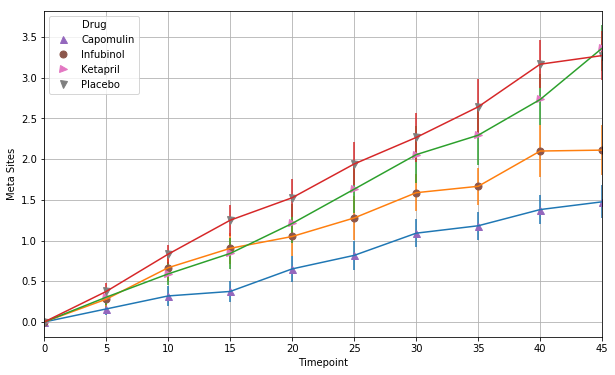

In [15]:
# Generate the Plot (with Error Bars)

ax = pivot_metasite_df[["Capomulin", "Infubinol","Ketapril",'Placebo']]\
            .plot( yerr = stderr_pivot_metasite_df, figsize= (10,6), legend = False)

ax.set_xlabel("Time (Days)")
ax.set_ylabel("Meta Sites")


pivot_metasite_df[["Capomulin","Infubinol", "Ketapril", "Placebo"]]\
            .plot(grid = True,style =['^','o','>','v'], markersize =7,legend =True, \
                  label = "Meta",ax = ax )

plt.show()

# Save the Figure

# Show the Figure


## Survival Rates

In [16]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

count_mice_df = trial_df.groupby(['Drug','Timepoint'])
# Convert to DataFrame
count_mice_df = count_mice_df['Mouse ID'].count()
count_mice_df = count_mice_df.reset_index()
count_mice_df = count_mice_df.rename(columns = {'Mouse ID': 'Mouse Count'})
# Preview DataFrame
count_mice_df.head()


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [17]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame
pivot_mouse_count = count_mice_df.pivot(index ='Timepoint', columns = 'Drug', values = 'Mouse Count')
pivot_mouse_count

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


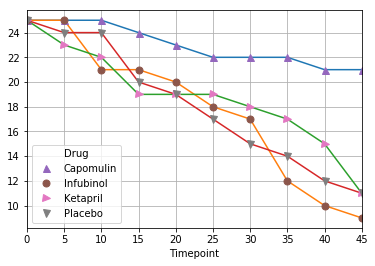

In [18]:
# Generate the Plot (Accounting for percentages)
ax = pivot_mouse_count[["Capomulin","Infubinol", "Ketapril", "Placebo"]].plot(legend = False)

pivot_mouse_count[["Capomulin","Infubinol", "Ketapril", "Placebo"]]\
            .plot(grid = True,style =['^','o','>','v'], markersize =7,legend =True, \
                  label = "Survival Rate",ax = ax )
# Save the Figure

# Show the Figure
#plt.show()

## Summary Bar Graph

In [19]:
# Calculate the percent changes for each drug

# Display the data to confirm


-0.19475302667894168
0.4251649185589741
0.4612347172785185
0.5702879468660607


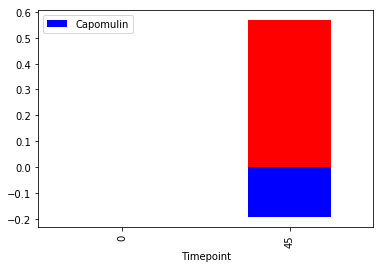

In [70]:
df1 = pivot_df.iloc[[0,9],:]
#print(df1)
# print(type(df1))
df1= df1.pct_change()
list1 = df1.iloc[1]
#print(df1)

# print(type(df1))
# print(df1.iloc[1])
#print(list1[0])
drug_list = ["Capomulin","Infubinol", "Ketapril", "Placebo"]
for i in range (4):
    if list1[i] < 0:
        assigned_color = "blue"
        print(list1[i])
        df1[drug_list[i]].plot(kind = "bar", color =assigned_color, legend = True)
    else:
        print(list1[i])
        assigned_color = "red"
        df1[drug_list[i]].plot(kind = "bar", color =assigned_color)

In [51]:
df1 = tuple (df1)
df1

('Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol')

In [22]:
df1.plot()

AttributeError: 'tuple' object has no attribute 'plot'

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()